In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
import pandas as pd

In [6]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from collections import namedtuple

In [7]:
train_df = pd.read_csv("dataset/output/dataset_polimi_extended.csv")

In [68]:
train_df.ix[train_df][['sottoarea','vendite']][:5]

,sottoarea,vendite
0,5,0
1,5,5
2,5,3
3,5,0
4,5,0


In [9]:
selection = namedtuple("selection", ("conditions", "selected_columns", "group"))

# Plotting

If you have modified something or added some panels click "Cell > Run all below" from this cell

In [92]:
selections = []
i = 0

In [93]:
colors = ['blue','green','red','cyan','magenta','yellow','black']

In [94]:
# COPY ONE OF THIS PANEL TO ADD A LINE
# modify the conditions but be careful: to be compared two lines must have the same x (e.g: "zona")
for j in range(1,28):
    selections.append(
        selection(
        conditions=((train_df['zona'] == j) &
                    (train_df['categoria'] == 2)) # add your condition with "& <condition>"
        ,selected_columns = ['mese','vendite'] # select the columns you are interested in
        ,group = ['mese'] # select the group for which you want the mean
        ))
    # print("I will be "+colors[j%len(colors)])


In [95]:
selected_dfs = [train_df[sel.conditions][sel.selected_columns].groupby(sel.group).sum()
               for sel in selections]
selected_couples = [(df.index.values, df['vendite'], colors[i%len(colors)]) for (i,df) in enumerate(selected_dfs)]
plot_list = [element for tupl in selected_couples for element in tupl]

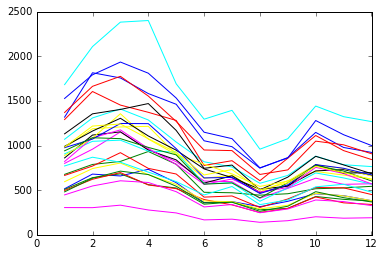

In [96]:
plt.plot(*plot_list)
plt.show()

In [97]:
sel1 = selection(
    conditions=((train_df['anno'] == 2014) &
                (train_df['mese'] == 2)) # add your condition with "& <condition>"
    ,selected_columns = ['sottoarea','vendite'] # select the columns you are interested in
    ,group = ['sottoarea'] # select the group for which you want the mean
    )

In [98]:
train_df[sel1.conditions][sel1.selected_columns].groupby(sel1.group).sum()

,vendite
sottoarea,
1,98
2,187
3,43
4,122
5,318
6,45
7,103
8,214
9,124


In [99]:
train_df.ix[train_df['categoria']==2][['sottoarea','vendite']][:5]

,sottoarea,vendite
870,5,0
871,5,2
872,5,3
873,5,0
874,5,0


# Correlazione giorni festivi - vendite
Giorni in cui festivo = 1 e vendite <= 2 / giorni in cui festivo era 1

In [100]:
# Tutto il dataset
df1 = train_df
len(df1[(df1.festivo == 1) & (df1.vendite <= 1)])/len(df1[(df1.festivo == 1)])

0.7796494217265593

In [101]:
# 2014
df2 = df1[(df1.anno == 2014)]
len(df2[(df2.festivo == 1) & (df2.vendite <= 2)])/len(df2[(df2.festivo == 1)])

0.8987573099415205

In [102]:
# 2015
df2 = df1[(df1.anno == 2015)]
len(df2[(df2.festivo == 1) & (df2.vendite <= 2)])/len(df2[(df2.festivo == 1)])

0.8926113613613613

In [103]:
# 2016
df2 = df1[(df1.anno == 2016)]
len(df2[(df2.festivo == 1) & (df2.vendite <= 2)])/len(df2[(df2.festivo == 1)])

0.8976483585858586

In [104]:
# Tutto meno il 2014
df2 = df1[(df1.anno != 2014)]
len(df2[(df2.festivo == 1) & (df2.vendite <= 2)])/len(df2[(df2.festivo == 1)])

0.8940412186379928